In [23]:
from finches import interaction_vector, epsilon_calculation, PDB_structure_tools

from finches.forcefields.calvados import calvados_model
from finches.forcefields.mPiPi import mPiPi_model

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### --------------------------------------------------------------------------
**NOTE** - for DIRECT computation of interaction epsilon vectors see __compute_epsilon_vector.ipynb__
### --------------------------------------------------------------------------

### SHOW Homotypic Sequence Vectors

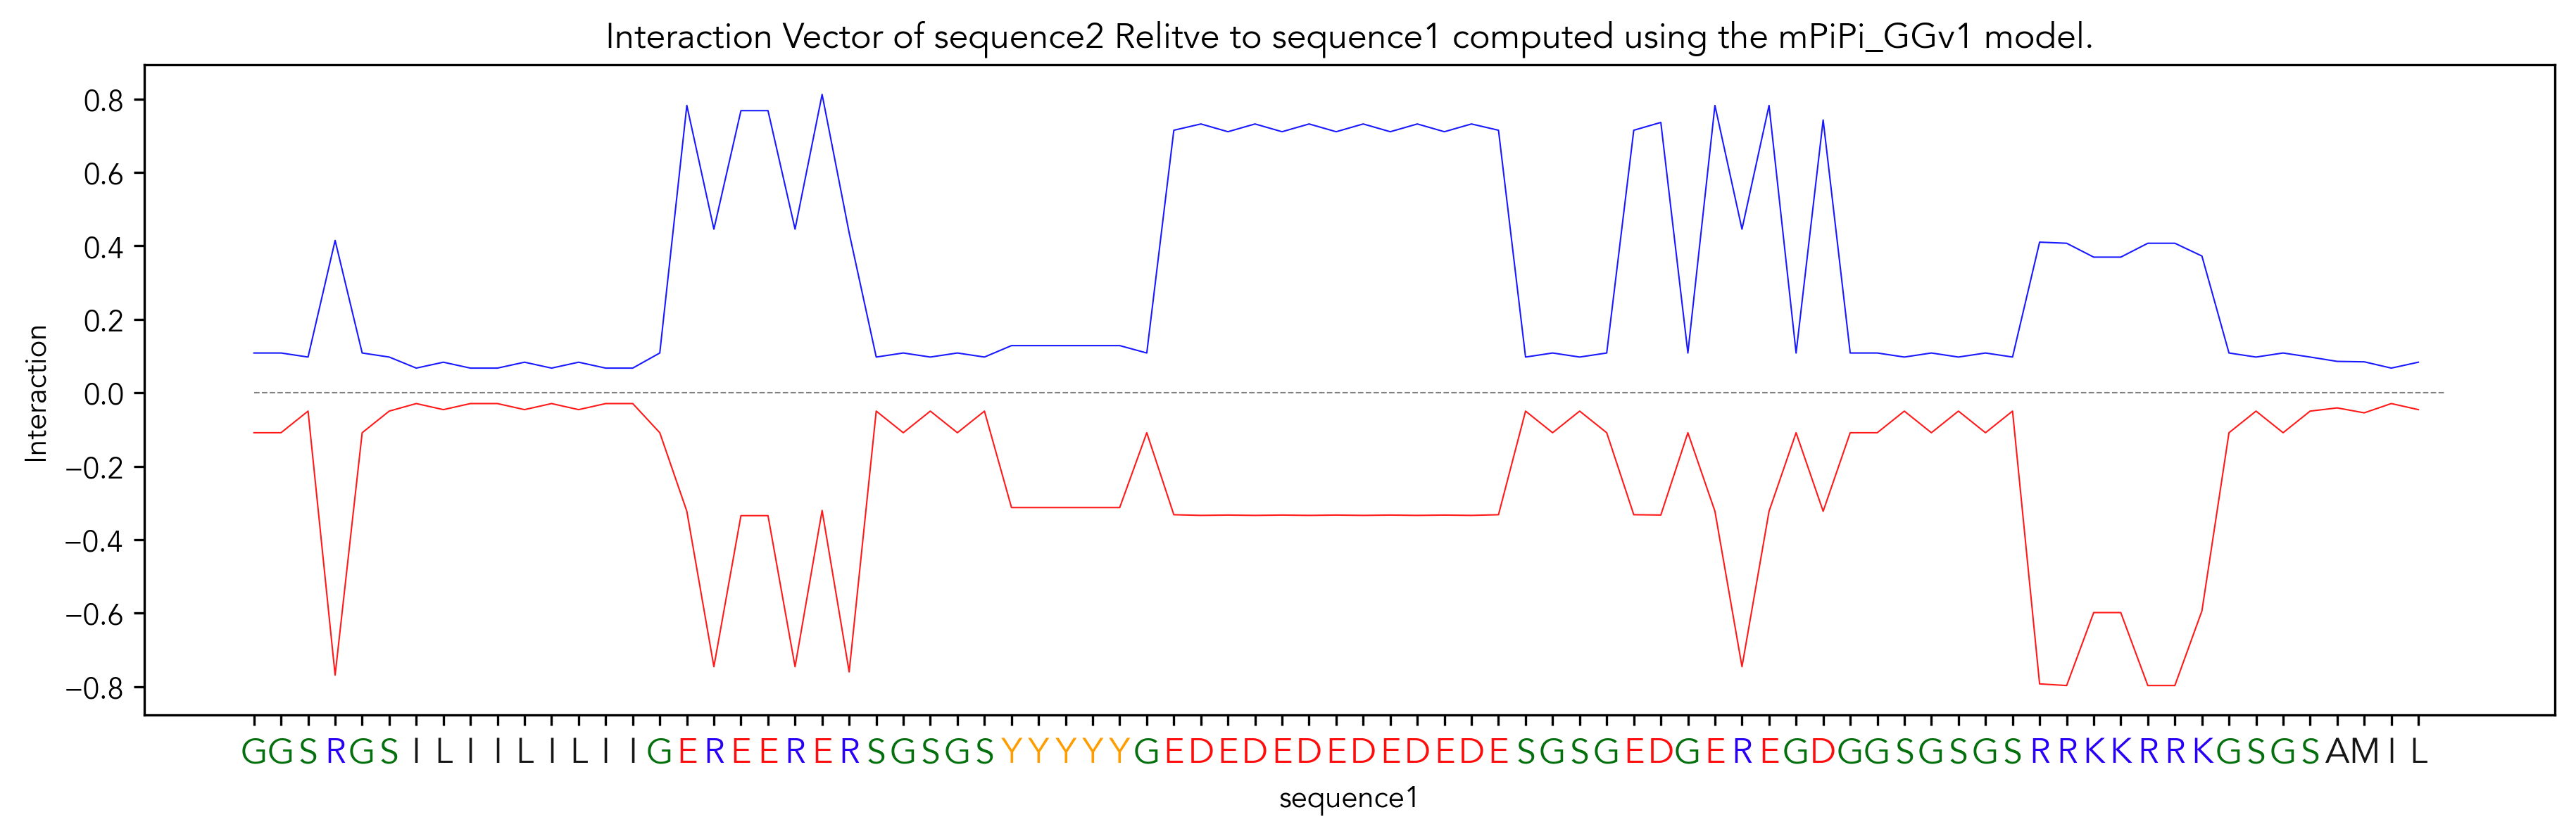

In [24]:
test_IDR = 'GGSRGSILIILILIIGEREERERSGSGSYYYYYGEDEDEDEDEDEDESGSGEDGEREGDGGSGSGSRRKKRRKGSGSAMIL'

# initialize forcefild model
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1')
CALVADOS2_model = calvados_model('CALVADOS2')

# intialize matrix constructor with model
X_local = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model) 

# compute epsilon
f = interaction_vector.show_sequence_interaction_vector(test_IDR, test_IDR, X_local)

### Compute Heterotypic Epsilon Vectors

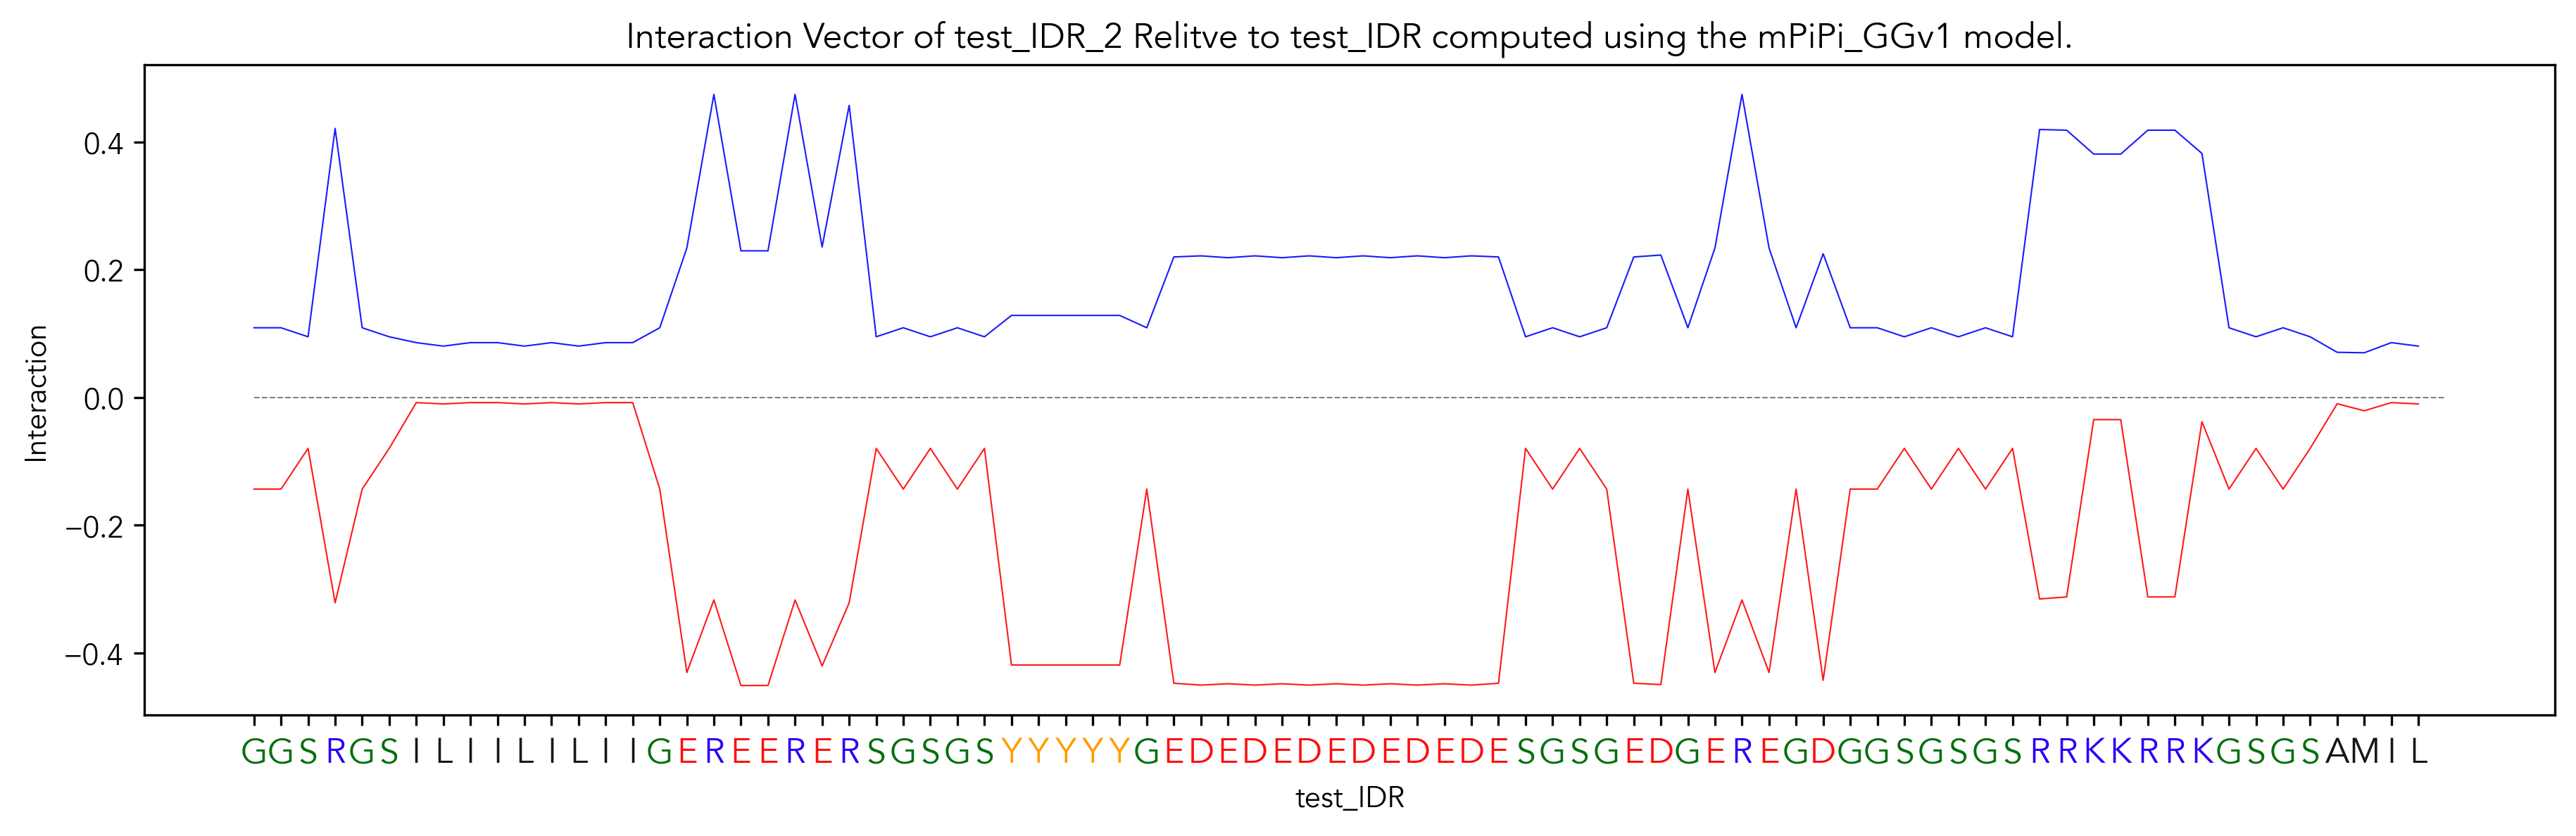

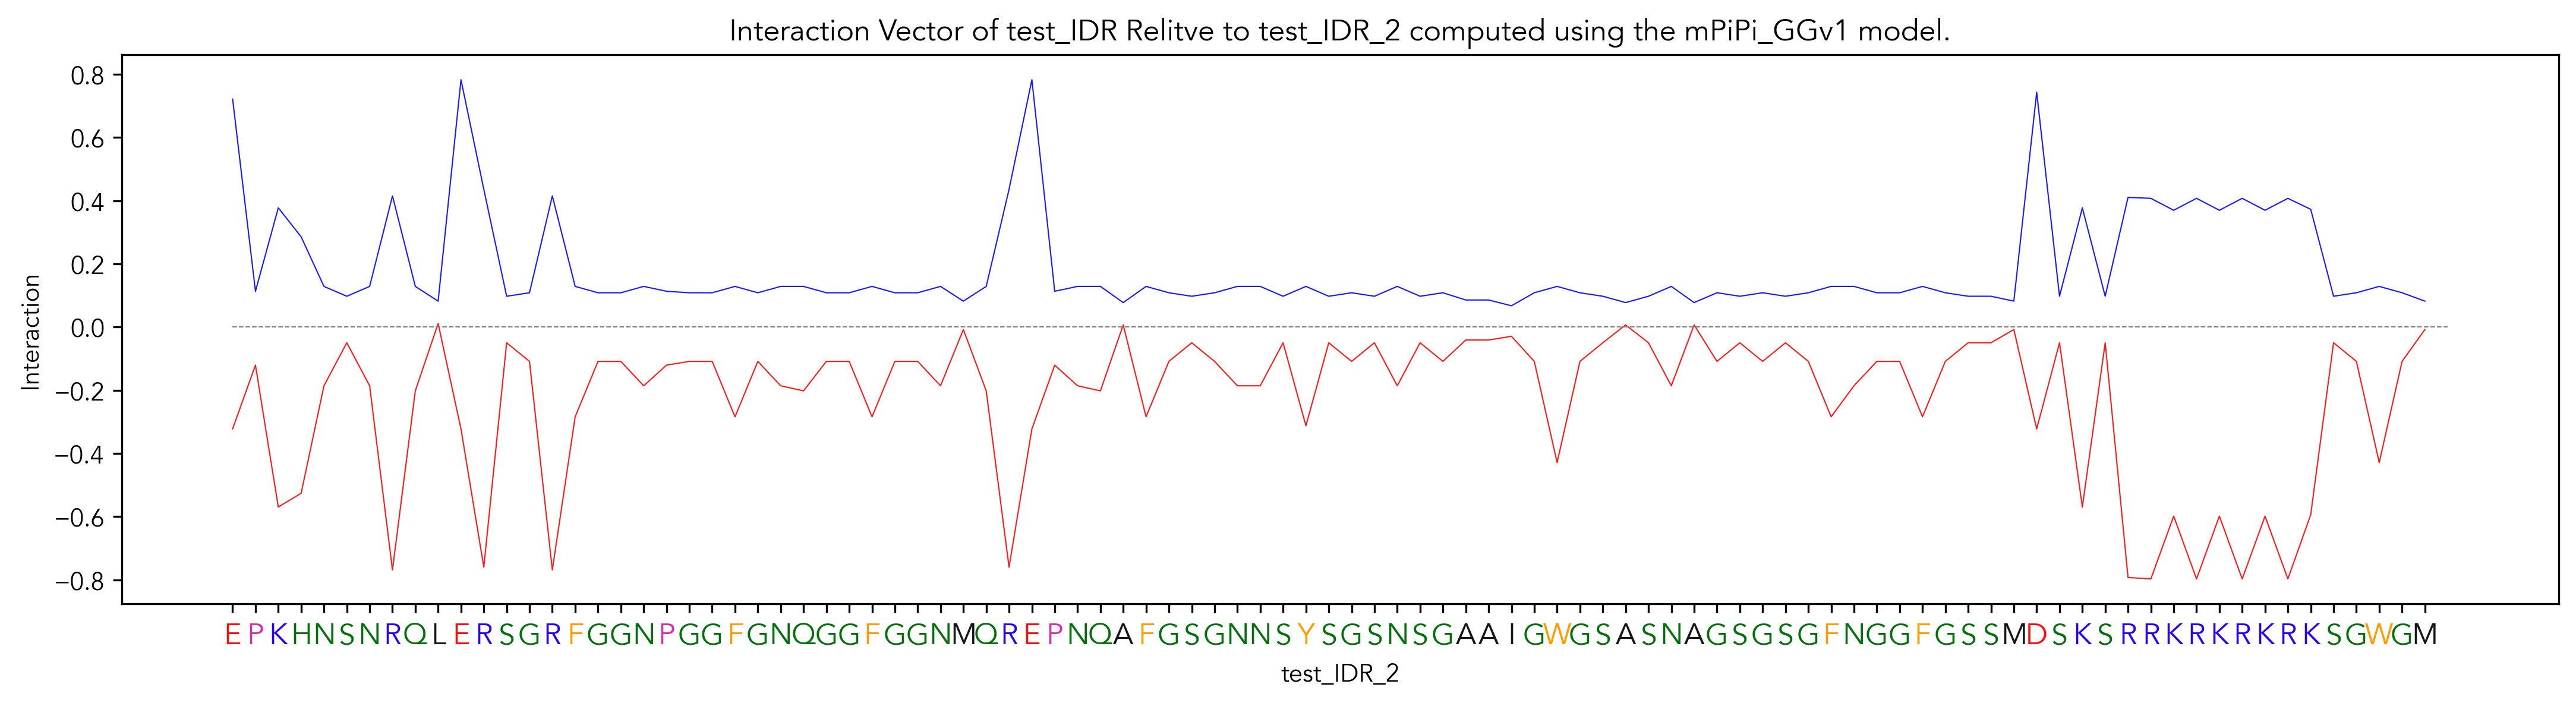

In [25]:
test_IDR = 'GGSRGSILIILILIIGEREERERSGSGSYYYYYGEDEDEDEDEDEDESGSGEDGEREGDGGSGSGSRRKKRRKGSGSAMIL'
test_IDR2 = 'EPKHNSNRQLERSGRFGGNPGGFGNQGGFGGNMQREPNQAFGSGNNSYSGSNSGAAIGWGSASNAGSGSGFNGGFGSSMDSKSRRKRKRKRKSGWGM'

# initialize forcefild model
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1')
CALVADOS2_model = calvados_model('CALVADOS2')

# intialize matrix constructor with model
X_local = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model) 

# compute epsilon
f1 = interaction_vector.show_sequence_interaction_vector(test_IDR, test_IDR2, X_local, sequence_names=['test_IDR','test_IDR_2'])
f2 = interaction_vector.show_sequence_interaction_vector(test_IDR2, test_IDR, X_local, sequence_names=['test_IDR_2','test_IDR'])

### Compute Heterotypic Epsilon Vectors with RNA

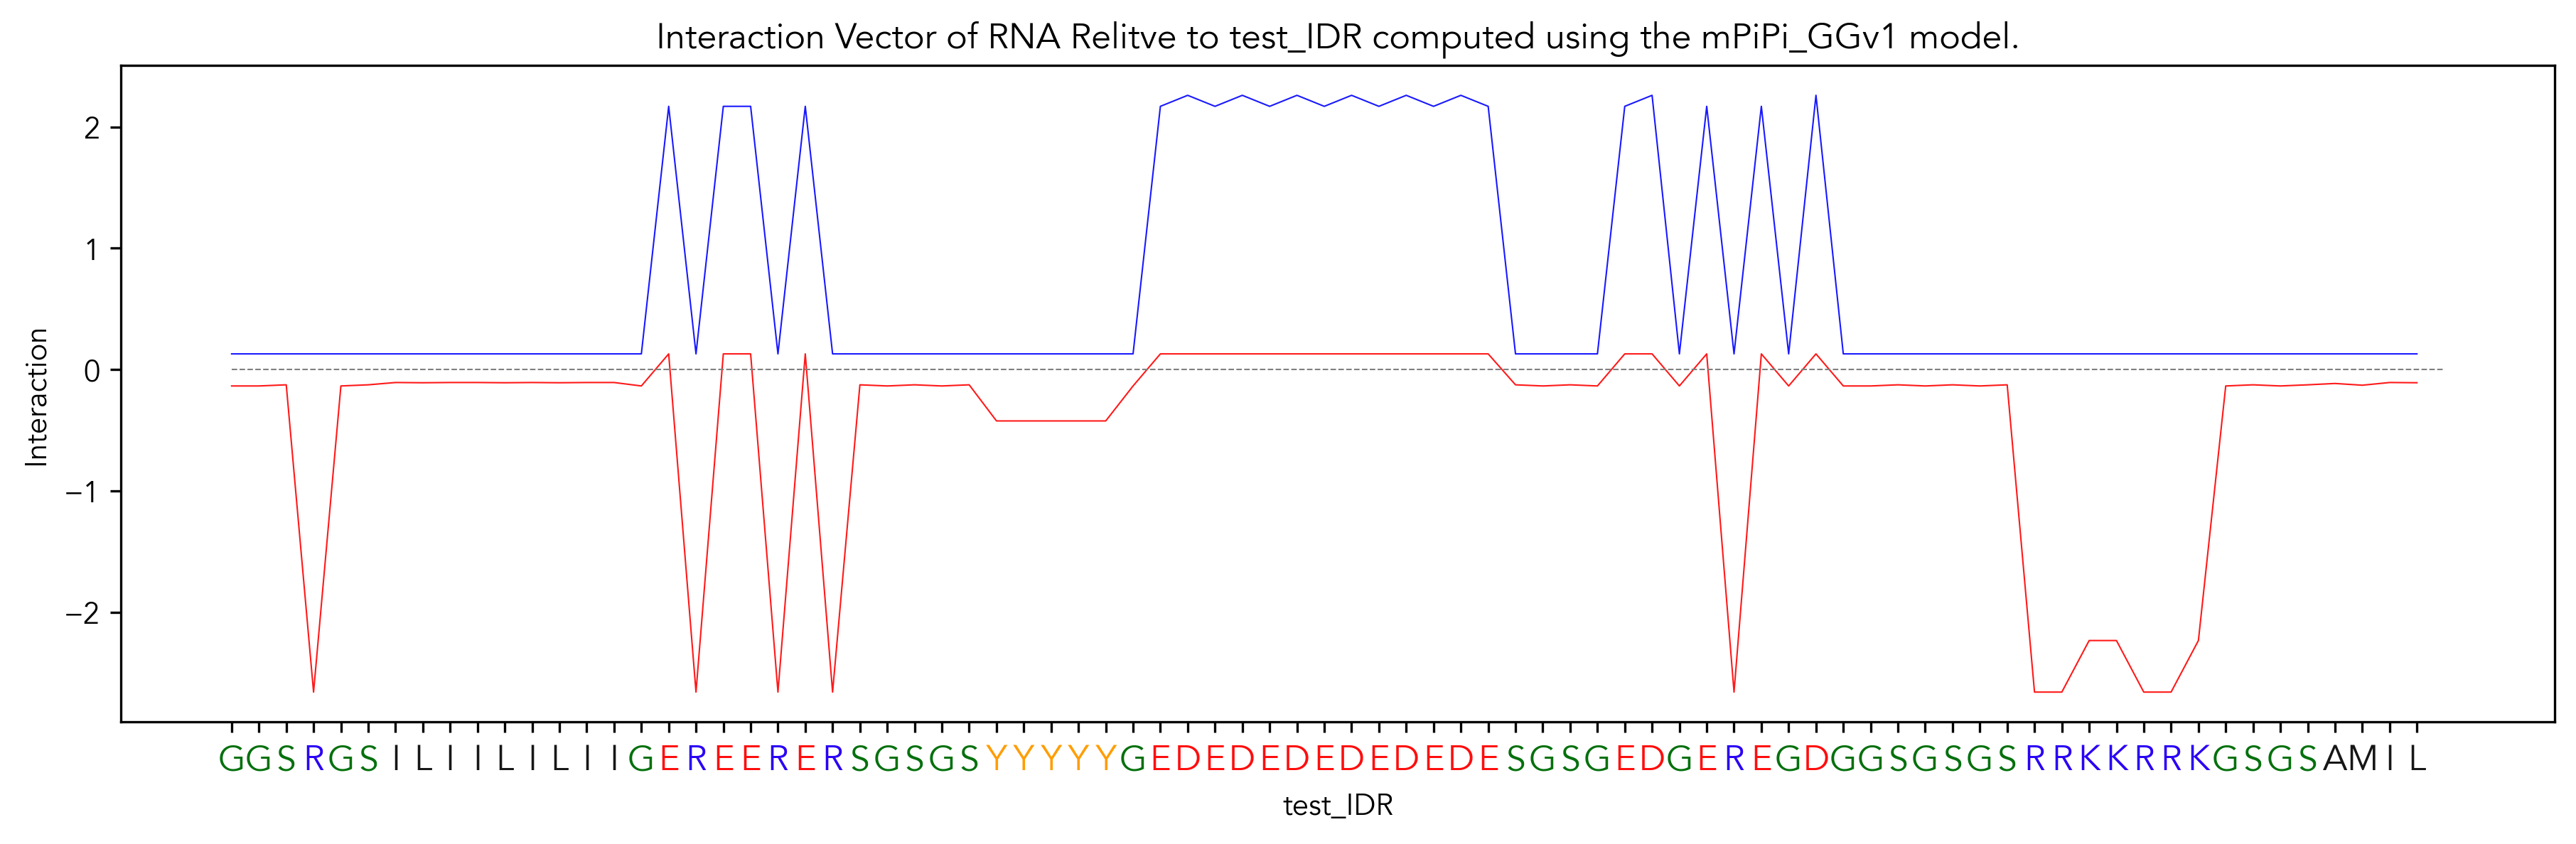

In [26]:
test_IDR = 'GGSRGSILIILILIIGEREERERSGSGSYYYYYGEDEDEDEDEDEDESGSGEDGEREGDGGSGSGSRRKKRRKGSGSAMIL'
RNA = 'UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU'

# initialize forcefild model
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1') # this is the only model that currently has RNA

# intialize matrix constructor with model
X_local = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model) 

# compute epsilon
f1 = interaction_vector.show_sequence_interaction_vector(test_IDR, RNA, X_local, sequence_names=['test_IDR','RNA'])

### SHOW Heterotypic Epsilon vectors with surface of FOLDED DOMAIN

**NOTE THIS DOES NOT ASSUME THE DOMAIN IS ISSOLATION**

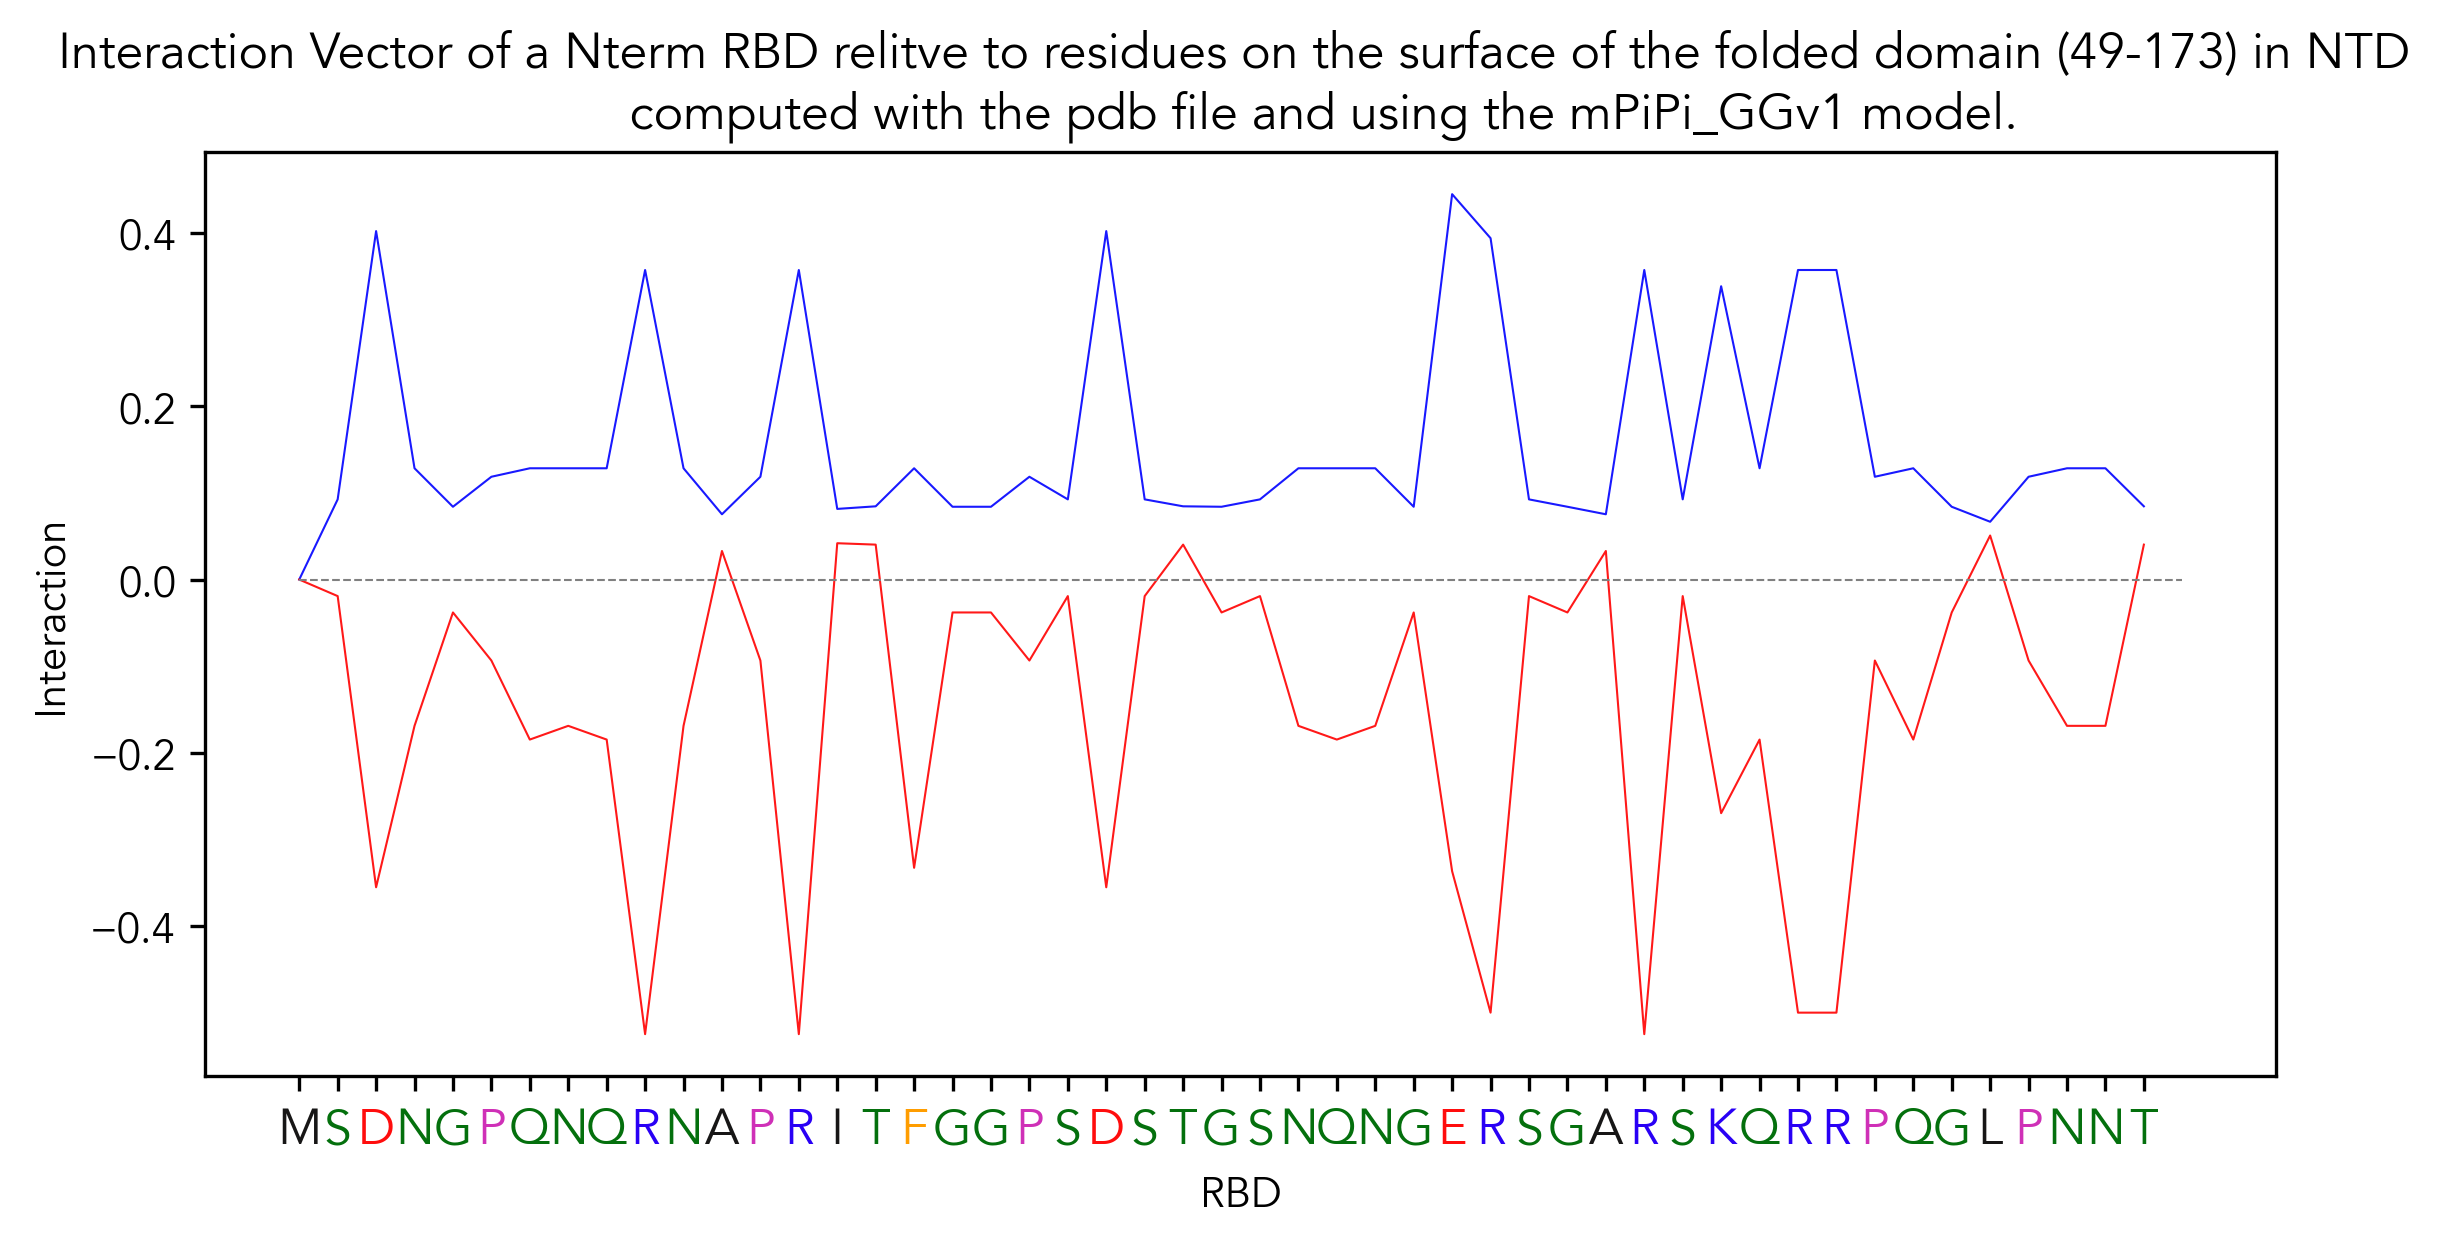

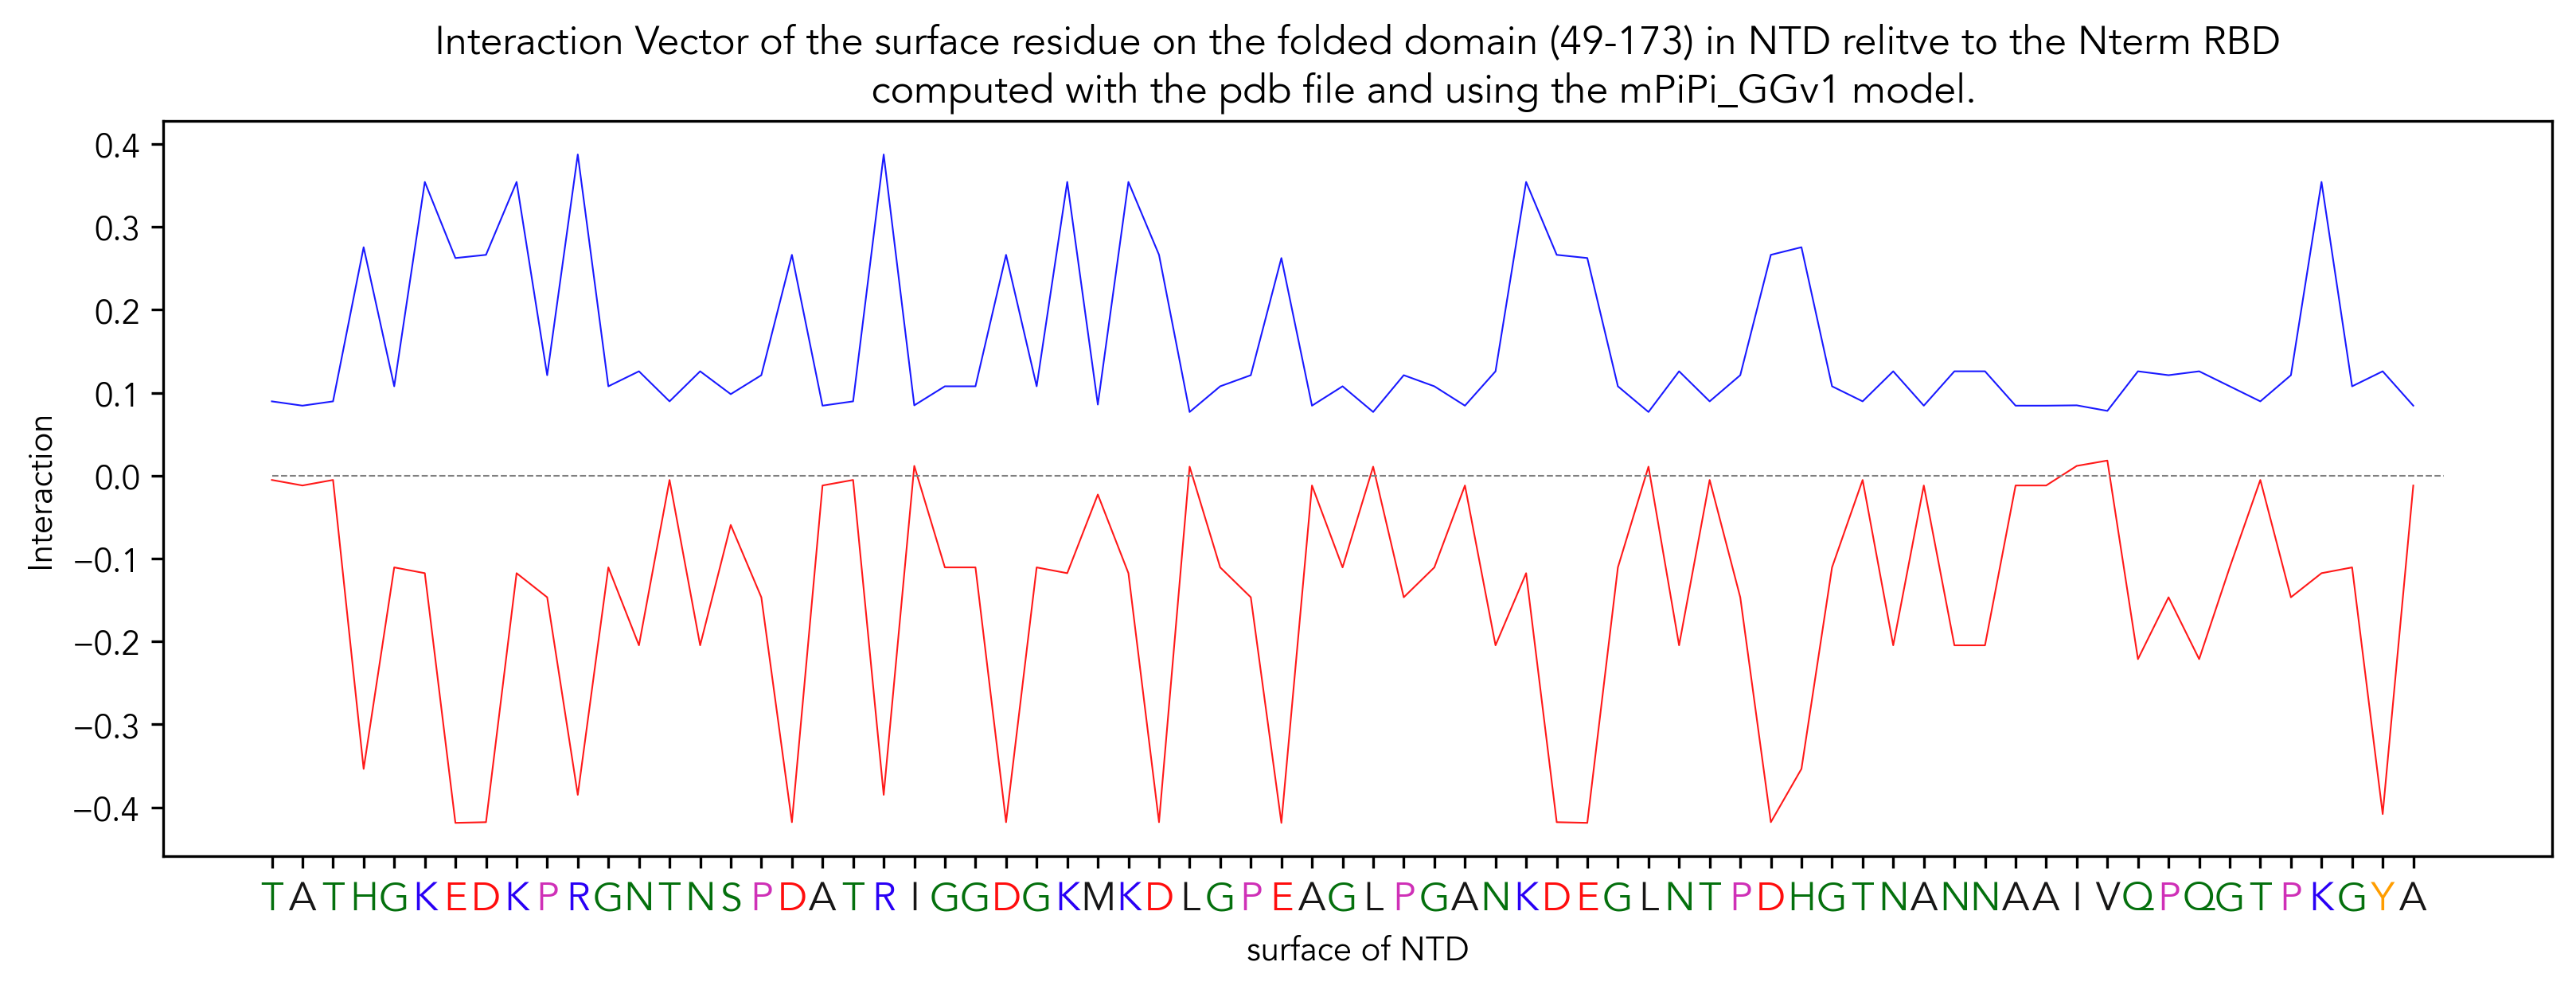

In [58]:
nterminal_IDR = 'MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT'
PDB_FILE = 'test_pdb.pdb'



# initialize forcefild model
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1')
CALVADOS2_model = calvados_model('CALVADOS2')

# intialize matrix constructor with model
X_local = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model) 


f = interaction_vector.show_folded_domain_interaction_on_sequence(PDB_FILE, 49, 173, nterminal_IDR, X_local, IDR_positon='Nterm', return_vectors=False, sequence_names=['NTD','RBD'] )
f = interaction_vector.show_folded_domain_interaction_on_sequence(PDB_FILE, 49, 173, nterminal_IDR, X_local, IDR_positon='Nterm', sequence_names=['NTD','RBD'],
                                                                  return_vectors=False, sequence_of_reff='sequence1')



### SHOW INTERACTION VECTOR ON SURFACE OF FOLDED DOMAIN

In [59]:
import py3Dmol
import matplotlib

colorby='attractive_vector' # @param [attractive_vector, repulsive_vector]

nterminal_IDR = 'MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT'
PDB_FILE = 'test_pdb.pdb'

total_seq_len = 172
IDR_positon = 'Nterm'

# initialize forcefild model
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1')
CALVADOS2_model = calvados_model('CALVADOS2')

# intialize matrix constructor with model
X_local = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model) 

pair_list, IDRs, FDs = PDB_structure_tools.extract_flanking_domain_combinations(PDB_FILE, return_domain_lists=True)

# get attractive and repulsive vectors that match the length of the full folded domain
FULL_FD_attractive_vector, FULL_FD_repulsive_vector = interaction_vector.make_interaction_vector_for_folded_domain(PDB_FILE, 49, 173, nterminal_IDR, X_local, IDR_positon=IDR_positon)

# compute attractive and repulsive vectors relitive to the IDR
SAFD_seq, SAFD_idxs, SAFD_cords = PDB_structure_tools.pdb_to_SDFDresidues_and_xyzs(PDB_FILE,  49, 173, issolate_domain=False)
print(SAFD_seq)
attractive_vector, repulsive_vector = epsilon_calculation.get_interdomain_epsilon_vectors(SAFD_seq, nterminal_IDR, X_local, SAFD_cords, IDR_positon=IDR_positon)

# conjoin vectors to make mega vector for visualization 
# only work when there is just an IDR and FD in the PDB
if IDR_positon == 'Nterm':
    plot_FULL_FD_repulsive_vector = np.array(list(repulsive_vector) + list(FULL_FD_repulsive_vector))
    plot_FULL_FD_attractive_vector = np.array(list(attractive_vector) + list(FULL_FD_attractive_vector))
else:
    plot_FULL_FD_repulsive_vector = np.array(list(FULL_FD_repulsive_vector)+ list(repulsive_vector))
    plot_FULL_FD_attractive_vector = np.array(list(FULL_FD_attractive_vector)+ list(attractive_vector))  


#################################################################
### ------------- Visualization with py3Dmol ---------------- ###
#################################################################

# read the correct pdb
with open(PDB_FILE) as fh:
    pdbdata=fh.read()

if colorby == 'attractive_vector':
    ### SHOW attractive vector 
    vector = [0]+plot_FULL_FD_attractive_vector.tolist()
    norm = matplotlib.colors.Normalize(vmin=plot_FULL_FD_attractive_vector.min(), vmax=0)
    normalized_values = norm(vector)

    # Create a color map from gray to blue based on the normalized values
    color_map = plt.cm.get_cmap('Reds_r')
    colors = [color_map(value) for value in normalized_values]

    hex_colors = [matplotlib.colors.to_hex(color) for color in colors]
    print(list(map(lambda a :len(a), [vector,normalized_values, colors, hex_colors])))
    
    view = py3Dmol.view(data=pdbdata,style={'sphere':{'colorscheme':{'prop':'resi','map':hex_colors},"radius": 1.75}}, width=1500, height=750)

    for fd in FDs:
        sel = f"{fd[0]}-{fd[1]}"
        view.addSurface(py3Dmol.SAS,{'opacity':1,'colorscheme':{'prop':'resi','map':hex_colors}}, {'resi':sel})

elif colorby == 'repulsive_vector':
    ### SHOW repulsive vector 
    vector = [0]+plot_FULL_FD_repulsive_vector.tolist()
    norm = matplotlib.colors.Normalize(vmin=0, vmax=plot_FULL_FD_repulsive_vector.max())
    normalized_values = norm(vector)

    # Create a color map from gray to blue based on the normalized values
    color_map = sns.color_palette("light:b", as_cmap=True)
    color_map = plt.cm.get_cmap('Blues')
    colors = [color_map(value) for value in normalized_values]
    hex_colors = [matplotlib.colors.to_hex(color) for color in colors]

    view = py3Dmol.view(data=pdbdata,style={'sphere':{'colorscheme':{'prop':'resi','map':hex_colors},"radius": 1.75}}, width=1500, height=750)

    for fd in FDs:
        sel = f"{fd[0]}-{fd[1]}"
        view.addSurface(py3Dmol.SAS,{'opacity':1,'colorscheme':{'prop':'resi','map':hex_colors}}, {'resi':sel})

view

TATHGKEDKPRGNTNSPDATRIGGDGKMKDLGPEAGLPGANKDEGLNTPDHGTNANNAAIVQPQGTPKGYA
[197, 197, 197, 197]


/var/folders/_v/5p_93tts4l19p0zl0jbrkmjw0000gn/T/ipykernel_34895/1729814178.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Reds_r')


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol